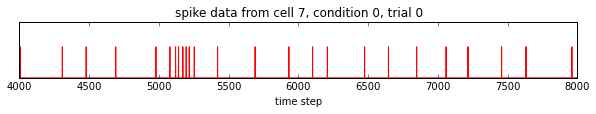

In [104]:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
import pandas

cell = 7
condition = 0
dataframe = pandas.read_pickle('/Users/c/exDropbox/Decoding2014Data/Moving_bars_ouput_cell_'+str(cell)+'.pkl')
# TODO RELATIVE PATH

# collect spiketrains from all trials of that cell & condition, within some time limits
trials = []
trial = 0
while True:
    try:
        trials.append(dataframe.ix[(condition,trial,0),4000:8000])
        trial += 1
    except:
        break
        
T = len(trials[0])
N = len(trials)
all_spiketrains = np.hstack(trials)

# Plot one spiketrain
figure(figsize=(10,1))
trial = 0
plot(np.arange(4000,8001),trials[trial],'r')
title('spike data from cell '+str(cell)+', condition '+str(condition)+', trial '+str(trial))
ylim([0,1.8])
yticks([])
xlabel('time step')

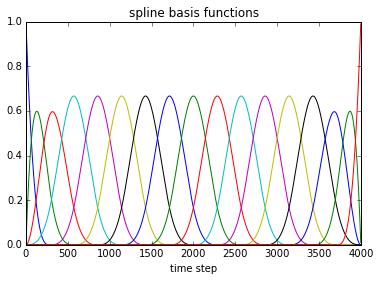

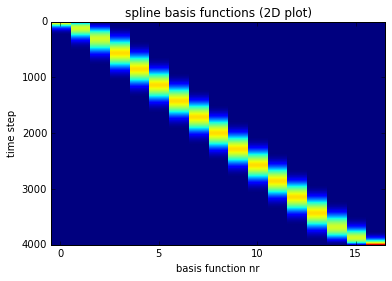

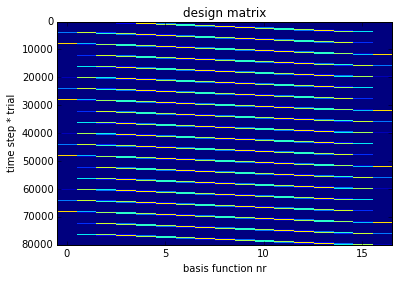

In [94]:
import splines
import statsmodels.api as sm

spline_order = 3
knots = splines.augknt(np.linspace(0,T,15),spline_order)
spline_bases = np.array(splines.spcol(range(T),knots,spline_order))
dm = np.tile(spline_bases,(N,1))


figure()
plot(spline_bases)
title('spline basis functions')
xlabel('time step')

figure()
imshow(spline_bases,aspect='auto',interpolation='nearest')
title('spline basis functions (2D plot)')
ylabel('time step')
xlabel('basis function nr')

figure()
imshow(dm,aspect='auto',interpolation='nearest')
title('design matrix')
ylabel('time step * trial')
xlabel('basis function nr')

In [99]:
model = sm.GLM(all_spiketrains,dm,family=sm.families.Binomial())
fitted_model = model.fit()

print all_spiketrains.shape
print dm.shape
print len(fitted_model.params)

(80020,)
(80020, 17)
17


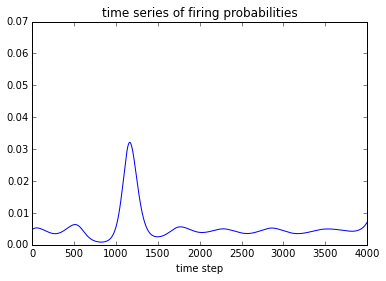

In [102]:
prediction = fitted_model.predict(dm)

figure()
plot( prediction[:T] )
ylim([0,0.07])
title('time series of firing probabilities')
xlabel('time step')